**Vishv Patel** <br>
**Student Number:** 8977662

## Lab 7 - Performance Metrics for Classification Problems

#### **Frame the Problem**

The goal of this lab is to **evaluate** a model for MNIST classification.

#### **Importing the Libraries**

In [1]:
import numpy as np

# plotting modules
from matplotlib import pyplot as plt
import seaborn as sns

# The web source of the MNIST dataset that we will work with
from sklearn.datasets import fetch_openml

# performance metrics
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score


### **1. Download the MNIST data**

In [2]:
mnist = fetch_openml('mnist_784', as_frame=False, parser='auto')

In [3]:
# Data
X = mnist.data
# Target
y = mnist.target

### **2. Explorateratory Data Analysis**

The object that is returned back from fetch_openml is a Bunch object, which is standard sklearn object, used for storing datasets.

In [4]:
type(mnist)

sklearn.utils._bunch.Bunch

It is a dictionary-like object, with keys and values.

In [5]:
list(mnist)

['data',
 'target',
 'frame',
 'categories',
 'feature_names',
 'target_names',
 'DESCR',
 'details',
 'url']

Describe the MNIST dataset

In [6]:
print(mnist.DESCR)

**Author**: Yann LeCun, Corinna Cortes, Christopher J.C. Burges  
**Source**: [MNIST Website](http://yann.lecun.com/exdb/mnist/) - Date unknown  
**Please cite**:  

The MNIST database of handwritten digits with 784 features, raw data available at: http://yann.lecun.com/exdb/mnist/. It can be split in a training set of the first 60,000 examples, and a test set of 10,000 examples  

It is a subset of a larger set available from NIST. The digits have been size-normalized and centered in a fixed-size image. It is a good database for people who want to try learning techniques and pattern recognition methods on real-world data while spending minimal efforts on preprocessing and formatting. The original black and white (bilevel) images from NIST were size normalized to fit in a 20x20 pixel box while preserving their aspect ratio. The resulting images contain grey levels as a result of the anti-aliasing technique used by the normalization algorithm. the images were centered in a 28x28 image b

In [7]:
# Data Exploration
print("Shape of the MNIST dataset:", mnist.data.shape)
print("Data type of features:", mnist.data.dtype)
print("Data type of labels:", mnist.target.dtype)
print("Number of unique labels:", np.unique(mnist.target))
print("Number of missing values:", np.isnan(mnist.data).sum())



Shape of the MNIST dataset: (70000, 784)
Data type of features: int64
Data type of labels: object
Number of unique labels: ['0' '1' '2' '3' '4' '5' '6' '7' '8' '9']
Number of missing values: 0


**Insights**<br>
* Shape of the MNIST dataset: The dataset contains 70,000 samples, each consisting of 784 features (representing pixel values of 28x28 images).
* Data type of features: The pixel values of the images are stored as integer values (int64).
* Data type of labels: The labels assigned to each image are stored as objects, typically representing strings.
* Number of unique labels: There are 10 unique labels in the dataset, ranging from '0' to '9', representing the digits from zero to nine.
* Number of missing values: There are no missing values in the dataset.

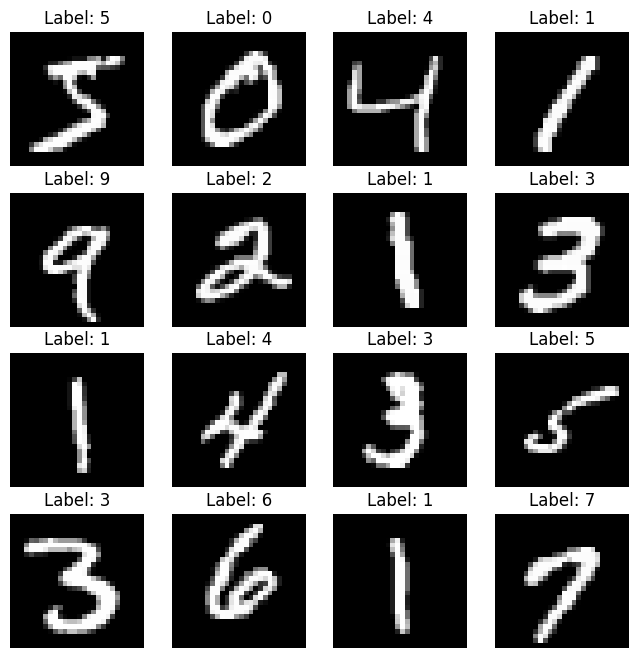

In [8]:
# Visualization

# Visualize some sample images
fig, axes = plt.subplots(4, 4, figsize=(8, 8))
for i, ax in enumerate(axes.flat):
    ax.imshow(mnist.data[i].reshape(28, 28), cmap='gray')
    ax.set_title("Label: %s" % mnist.target[i])
    ax.axis('off')
plt.show()


**Insight**<br>
* To visualize some sample images along with the distribution of labels.
* The data is in the Image format, which represent humans written numeric values for digit 0 to 9

##### **Histogram**

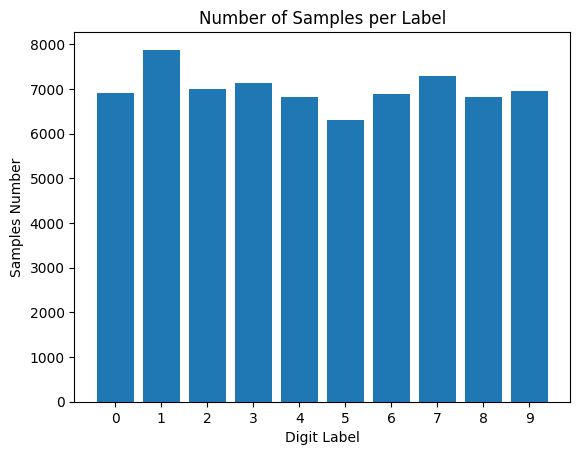

In [9]:
# Plot the distribution of labels
label_counts = np.bincount(y.astype(int))

# Plot histogram
plt.bar(range(10), label_counts)
plt.xlabel('Digit Label')
plt.ylabel('Samples Number')
plt.title('Number of Samples per Label')
plt.xticks(range(10))
plt.show()

**Insight from Histogram**<br>
* The graph shows the number of samples per label in a dataset of handwritten digits. 
* The x-axis shows the digit label, and the y-axis shows the number of samples in the dataset with that label.
* The most frequent digit is "1", with around 8,000 samples.
* The least frequent digit is "5", with around 6,500 samples.

In [10]:
# Calculate pixel value statistics
pixel_min = np.min(mnist.data)
pixel_max = np.max(mnist.data)
pixel_mean = np.mean(mnist.data)
pixel_std = np.std(mnist.data)

# Print pixel value statistics
print("Minimum Pixel Value:", pixel_min)
print("Maximum Pixel Value:", pixel_max)
print("Mean Pixel Value:", pixel_mean)
print("Standard Deviation of Pixel Values:", pixel_std)


Minimum Pixel Value: 0
Maximum Pixel Value: 255
Mean Pixel Value: 33.385964741253645
Standard Deviation of Pixel Values: 78.65437362689433


**Insights**
* Minimum Pixel Value: The lowest pixel value observed in the dataset is 0, which likely corresponds to no intensity in grayscale images.
* Maximum Pixel Value: The highest pixel value observed is 255, which corresponds to maximum intensity in grayscale images.
* Mean Pixel Value: The average pixel value across all images in the dataset is approximately 33.39. This indicates an overall lower intensity level, suggesting that the images are predominantly composed of darker shades.
* Standard Deviation of Pixel Values: The standard deviation of pixel values is approximately 78.65. This measures the spread of pixel values around the mean. A higher standard deviation implies greater variability in pixel intensities across the dataset.

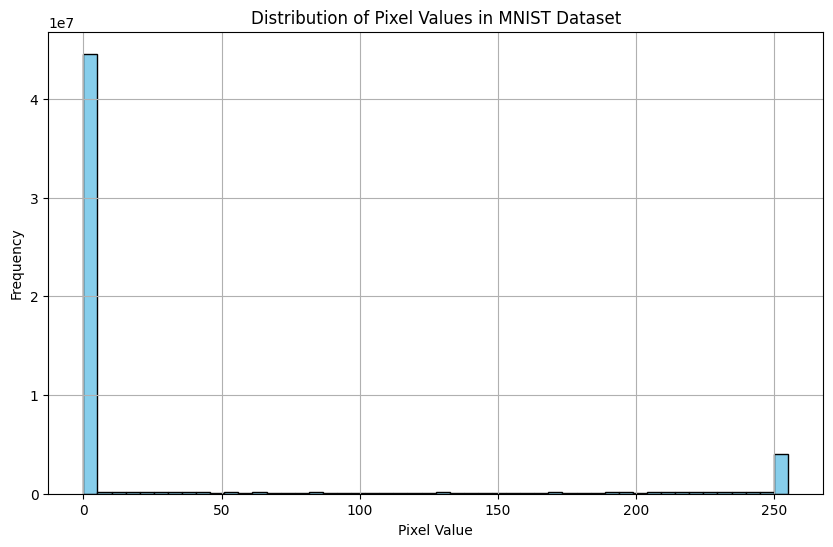

In [11]:
# Visualize the distribution of pixel values
plt.figure(figsize=(10, 6))
plt.hist(mnist.data.flatten(), bins=50, range=(0, 255), color='skyblue', edgecolor='black')
plt.title('Distribution of Pixel Values in MNIST Dataset')
plt.xlabel('Pixel Value')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

**Insights**
* This is line graph of the distribution of pixel values in the MNIST dataset. The x-axis represents the pixel value, and the y-axis represents the frequency.
* The most common pixel value is around '0' and '250', which is represent pure white and black color respectively. This is because the MNIST dataset consists of black and white images of handwritten digits.
* The distribution of pixel values is asymmetrical, meaning that there are more pixels that are lighter than the pixels that are darker.
* The standard deviation is relatively high, which means that most of the pixels in the images have values that are not close to the average. This is because the MNIST dataset is a collection of black and white images with some variation in grayscale. 

### **3. The original MNIST has 10 classes. I selected 3 Classes : [3,4,5]**

* The original dataset have 10 classes which represent each digit from '0' to '9', and from that I have choosen 3 classes including the digit 3, 4, and 5.

In [12]:
# Define selected classes
chose_classes = [3, 4, 5]

# Filter dataset for selected classes
X1 = X[np.isin(y.astype(int), chose_classes)]
y1 = y[np.isin(y.astype(int), chose_classes)]

### **4. Split the dataset to train-validation-test.**

* The entire dataset is divided into 70% for the training set, 15% for the validation set, and 15% for the test set.

In [13]:
from sklearn.model_selection import train_test_split

# Split the dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X1, y1, test_size=0.2, random_state=42)

# Further split the train set into train and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

# Print the shapes of the resulting sets
print("Shape of X_train:", X_train.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of X_val:", X_val.shape)
print("Shape of y_val:", y_val.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_test:", y_test.shape)


Shape of X_train: (12977, 784)
Shape of y_train: (12977,)
Shape of X_val: (3245, 784)
Shape of y_val: (3245,)
Shape of X_test: (4056, 784)
Shape of y_test: (4056,)


### **5. Train the Model**

I have selected Stochastic Gradient Descent (SGD) classifier model for training from [Kaggle](https://www.kaggle.com/code/jimmynoujaim/mnist-dataset)

In [14]:
from sklearn.linear_model import SGDClassifier
model = SGDClassifier(random_state=42)
model.fit(X_train, y_train) 

SGDClassifier(random_state=42)

### **6. Evaluate the model on the validation dataset**

In [15]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Predict labels for validation set
y_val_pred = model.predict(X_val)

**i. Accuracy**

In [16]:
# Calculate accuracy
accuracy = accuracy_score(y_val, y_val_pred)
print("Accuracy:", accuracy)


Accuracy: 0.9491525423728814


Accuracy (Overall Performance):

* The overall accuracy of the model on the validation set is approximately 94.92%. This indicates that the model correctly predicts the digit class for approximately 94.92% of the images in the validation set.

**ii. Confusion Matrix**

array([[1142,   13,   14],
       [   5, 1061,    5],
       [  97,   31,  877]], dtype=int64)

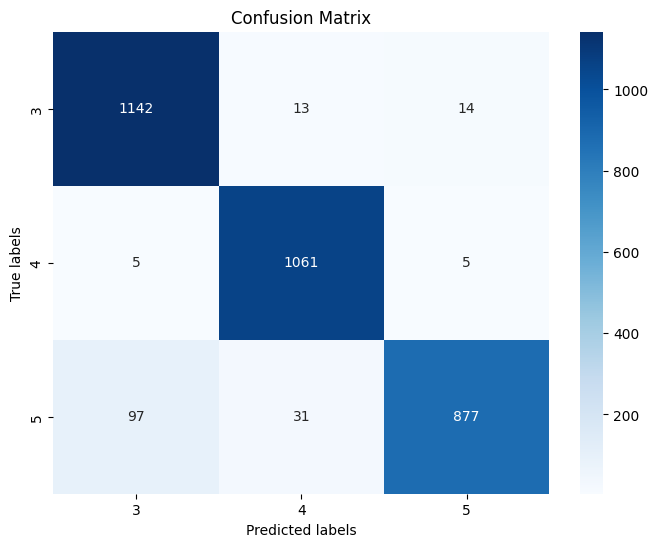

In [17]:
# Calculate confusion matrix
conf_matrix = confusion_matrix(y_val, y_val_pred)
display(conf_matrix)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=model.classes_, yticklabels=model.classes_)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()


Confusion Matrix :

* The confusion matrix provides a detailed breakdown of the model's predictions. It shows the number of true positives (diagonal elements) and the number of false positives and false negatives for each class. <br>
* For example, 
1. True Positive (TP): The model correctly predicted 1142 instances of class 3.
2. False Positive (FP): The model incorrectly predicted 13 instances of class 4 and 14 instances of class 5 as class 3.
3. False Negative (FN): The model incorrectly predicted 5 instances of class 3 as class 4 and 97 instances of class 3 as class 5.
4. True Negative (TN): This metric is not explicitly mentioned in the confusion matrix for multiclass classification problems.

**iii. Precision, Recall and F1 for each class**

In [18]:
# Calculate precision, recall, and F1-score for each class
report = classification_report(y_val, y_val_pred, target_names=[str(c) for c in model.classes_])
print("Classification Report:")
print(report)

Classification Report:
              precision    recall  f1-score   support

           3       0.92      0.98      0.95      1169
           4       0.96      0.99      0.98      1071
           5       0.98      0.87      0.92      1005

    accuracy                           0.95      3245
   macro avg       0.95      0.95      0.95      3245
weighted avg       0.95      0.95      0.95      3245



**Insights**
* Precision: Precision measures the proportion of true positive predictions out of all positive predictions made by the model.
* Recall: Recall (also known as sensitivity) measures the proportion of true positive predictions out of all actual positive instances in the dataset.
* F1-score: The F1-score is the harmonic mean of precision and recall. It provides a balanced measure of both precision and recall.
Support: The number of instances in each class in the validation set.

| Class | Precision | Recall | F1-Score | Support |
|-------|-----------|--------|----------|---------|
|   3   |   0.92    |  0.98  |   0.95   |  1169   |
|   4   |   0.96    |  0.99  |   0.98   |  1071   |
|   5   |   0.98    |  0.87  |   0.92   |  1005   |
|Accuracy|------|----|0.95|3245|
| Macro Avg |   0.95    |  0.95  |   0.95   |  3245   |
| Weighted Avg |   0.95    |  0.95  |   0.95   |  3245   |


**iv. Precision-Recall curve for one class of your choice vs. all others**

In [19]:
from sklearn.metrics import precision_recall_curve

y_scores = model.decision_function(X_val)
y_scores_4 = y_scores[:, 1]
y_val_4 = (y_val == '4').astype(int)
precisions, recalls, thresholds = precision_recall_curve(y_val_4, y_scores_4)

print(precisions[:5])
print(recalls[:5])
print(thresholds[:5])


[0.33004622 0.33014797 0.33024977 0.33035163 0.33045356]
[1. 1. 1. 1. 1.]
[-484618.54863886 -479388.39934954 -470773.90492501 -462411.75931229
 -458086.95997175]


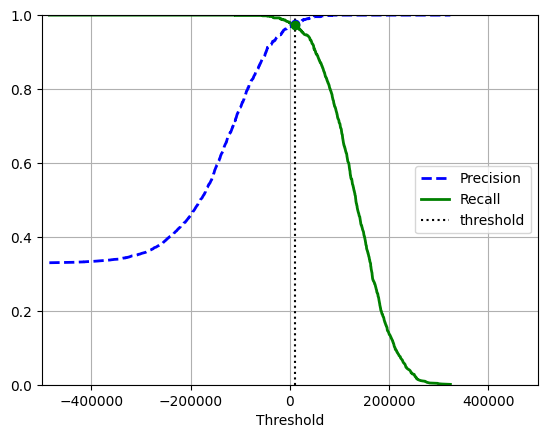

In [20]:
threshold = 10000
plt.plot(thresholds, precisions[:-1], "b--", label="Precision", linewidth=2)
plt.plot(thresholds, recalls[:-1], "g-", label="Recall", linewidth=2)
plt.vlines(threshold, 0, 1.0, "k", "dotted", label="threshold")
idx = (thresholds >= threshold).argmax()  # first index ≥ threshold
plt.plot(thresholds[idx], precisions[idx], "bo")
plt.plot(thresholds[idx], recalls[idx], "go")
plt.axis([-500000, 500000, 0, 1])
plt.grid()
plt.xlabel("Threshold")
plt.legend(loc="center right")
plt.show()

**Insight**<br>
* At Threshold = 10,000 the precision and recall is almost same around 0.95
* As can be seen from the precision-recall curve, lowering the threshold results in a decrease in precision and an increase in recall, while raising the threshold leads to an increase in precision and a decrease in recall.

### **7a. How to increase recall for chosen class without retraining the model** 

* To increase recall for a chosen class without retraining the model, we can lower the decision threshold. By doing so, it is liberal in predicting positive instances, which can lead to higher recall at the expense of precision. 

In [21]:
from sklearn.metrics import precision_score, recall_score

idx_for_90_precision = (precisions >= 0.90).argmax()
threshold_for_90_precision = thresholds[idx_for_90_precision]
print('threshold for 90% precision: ', threshold_for_90_precision)

y_val_pred_90 = (y_scores_4 >= threshold_for_90_precision)
print('precision score: ', precision_score(y_val_4, y_val_pred_90))
print('recall score: ', recall_score(y_val_4, y_val_pred_90))

threshold for 90% precision:  -47398.06592952652
precision score:  0.9005897219882055
recall score:  0.9981325863678805


### **7b. How to increase precision for chosen class without retraining the model** 

* To increase precision for a chosen class without retraining the model, we can adjust the decision threshold used for classification. By increasing the threshold, it is predicting positive instances, which can lead to higher precision at the expense of recall. 

In [22]:
from sklearn.metrics import precision_score, recall_score

idx_for_90_recall = (recalls >= 0.90).argmin() - 1
threshold_for_90_recall = thresholds[idx_for_90_recall]
print('threshold for 90% recall: ', threshold_for_90_recall)

y_val_pred_90 = (y_scores_4 >= threshold_for_90_recall)
print('precision score: ', precision_score(y_val_4, y_val_pred_90))
print('recall score: ', recall_score(y_val_4, y_val_pred_90))

threshold for 90% recall:  52383.440821398486
precision score:  0.9958677685950413
recall score:  0.900093370681606


### **8. Evaluate the model on test set**

In [23]:
from sklearn.metrics import accuracy_score
 
# Make predictions on the test set
y_test_pred = model.predict(X_test)

# Calculate Accuracy on the test set
accuracy_test = accuracy_score(y_test, y_test_pred)
print("Test Accuracy:", accuracy_test)


Test Accuracy: 0.9511834319526628


[[1378    7   27]
 [   8 1342    8]
 [ 107   41 1138]]


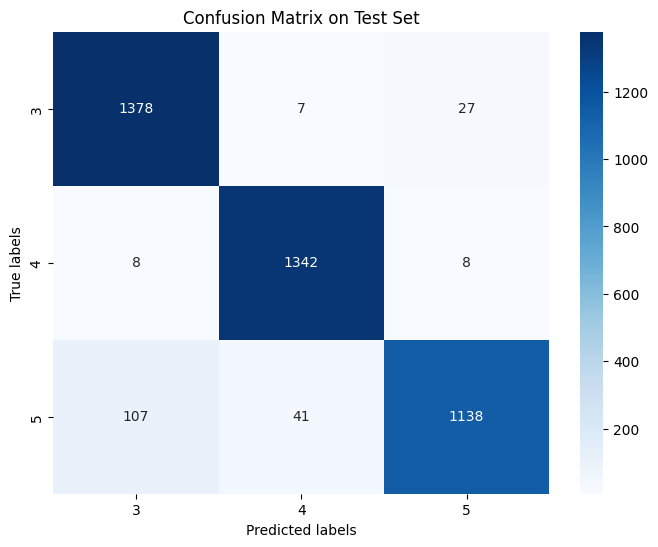

In [24]:
# Calculate confusion matrix on the test set
conf_matrix_test = confusion_matrix(y_test, y_test_pred)
print(conf_matrix_test)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_test, annot=True, fmt='d', cmap='Blues', xticklabels=model.classes_, yticklabels=model.classes_)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix on Test Set')
plt.show()


In [25]:
# Calculate precision for each class
precision_per_class = precision_score(y_test, y_test_pred, average=None)

# Calculate recall for each class
recall_per_class = recall_score(y_test, y_test_pred, average=None)

# Calculate F1-score for each class
f1_per_class = f1_score(y_test, y_test_pred, average=None)

# Print precision, recall, and F1-score for each class
for i, class_name in enumerate(model.classes_):
    print("Class:", class_name)
    print("Precision:", precision_per_class[i])
    print("Recall:", recall_per_class[i])
    print("F1-score:", f1_per_class[i])
    print()


Class: 3
Precision: 0.9229738780977896
Recall: 0.9759206798866855
F1-score: 0.948709122203098

Class: 4
Precision: 0.9654676258992806
Recall: 0.9882179675994109
F1-score: 0.9767103347889374

Class: 5
Precision: 0.9701619778346121
Recall: 0.8849144634525661
F1-score: 0.9255795038633591



### **Conclusion**

Based on the evaluation results on the test dataset, here are some conclusions for each class and overall performance:

1. Overall Model Performance:<br>

* The overall accuracy on the test dataset is approximately 95.12%. This indicates that the model correctly predicts the digit class for about 95.12% of the images in the test set.

2. Confusion Matrix:<br>

* The confusion matrix provides a detailed breakdown of the model's predictions for each class. It shows the number of true positives, false positives, and false negatives.
* For example, in the first row, the model predicted 1342 instances of class 4 correctly (true positives), while misclassifying 8 instances of class 4 as class 3 (false positives) and 8 instances of class 4 as class 5 (false positives).

3. Class-Specific Metrics:

i. Class 3 (Precision: 0.92, Recall: 0.98, F1-score: 0.95):

* The model performs well for class 3 with high precision, recall, and F1-score, indicating accurate and comprehensive predictions for this class.

ii. Class 4 (Precision: 0.97, Recall: 0.99, F1-score: 0.98):

* Class 4 also demonstrates high precision, recall, and F1-score, indicating excellent performance in identifying instances of class 4.

iii. Class 5 (Precision: 0.97, Recall: 0.88, F1-score: 0.93):

* While precision and recall for class 5 are good, the lower recall suggests that the model may have more difficulty correctly identifying instances of class 5 compared to classes 3 and 4.

4. Consideration:

* Depending on the application, the trade-off between precision and recall may need to be carefully considered. For instance, if false positives or false negatives have different costs or implications, the model's threshold could be adjusted accordingly to prioritize one metric over the other.